In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as pl
import numpy.matlib as geek
from PIL import Image 
from scipy.ndimage.interpolation import rotate
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

image = scipy.io.loadmat('GroundTruthReconstruction.mat')
trueImage=np.fliplr(np.rot90(image['FBP1200'],2))

mat = scipy.io.loadmat('sinogram1200norm.mat') 
sinogram=mat['s']

#mat = scipy.io.loadmat('Data328Onlym.mat') 
#sinogram=mat['m']

size=len(sinogram)
np.set_printoptions(suppress=True,formatter={'float_kind':'{:16.8f}'.format}, linewidth=130)
iteration=np.arange(0,1200,1)

In [2]:
iteration*(360/1200)


array([      0.00000000,       0.30000000,       0.60000000, ...,     359.10000000,     359.40000000,     359.70000000])

In [3]:
no_of_fun=12
#delete 5,9
def similarity (blur,org):
    val=[]
    val.append(mse(blur,org))
    val.append(rmse(blur, org))
    val.append(psnr(blur, org))
    val.append(ssim(blur, org)[0])
    val.append(ssim(blur,org)[1])
    val.append(uqi(blur, org))
    val.append(msssim(blur, org))
    val.append(ergas(blur, org))
    val.append(scc(blur, org))
    val.append(rase(blur, org))
    val.append(sam(blur, org))
    val.append(vifp(blur, org))
    return np.array(val,dtype='float64')

In [4]:
def normalize16(I):
    mn= np.min(I)
    mx = np.max(I)
    mx -= mn

    I = ((I - mn)/(mx+0.0000001)) * 65535
    return I.astype(np.uint16)

C:\Users\singh\AppData\Roaming\Python\Python39\site-packages\sewar\full_ref.py:248: RuntimeWarning: divide by zero encountered in true_divide
  rase_map = (100./M) * np.sqrt( np.sum(rmse_map**2,axis=2) / N )
C:\Users\singh\AppData\Roaming\Python\Python39\site-packages\sewar\full_ref.py:270: RuntimeWarning: invalid value encountered in double_scalars
  val = np.clip(np.dot(GT[:,i],P[:,i]) / (np.linalg.norm(GT[:,i])*np.linalg.norm(P[:,i])),-1,1)
C:\Users\singh\AppData\Roaming\Python\Python39\site-packages\sewar\full_ref.py:355: RuntimeWarning: invalid value encountered in double_scalars
  return num/den
C:\Users\singh\AppData\Local\Temp\ipykernel_20832\3663607695.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(val,dtype='float64')


CPU times: total: 19h 4min 5s
Wall time: 19h 1min 4s


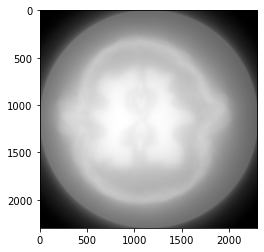

In [5]:
%%time
ls = [[0]*size]*size
main=np.array(ls)+1
true_Image=normalize16(trueImage)
stats = np.array(range(no_of_fun)).astype('float')
for i in iteration:
    out_mat = geek.repmat(sinogram[:,i], size, 1)
    out_mat=rotate(out_mat,(i*(360/1200)),reshape=False)
    stats=np.vstack((stats,similarity(normalize16(main),true_Image)))
    data = Image.fromarray(normalize16(main))
    st="FB\Image "+str(i)+".png"
    data.save(st)
    main=main.__add__(out_mat)
pl.imshow(main,cmap="gray")

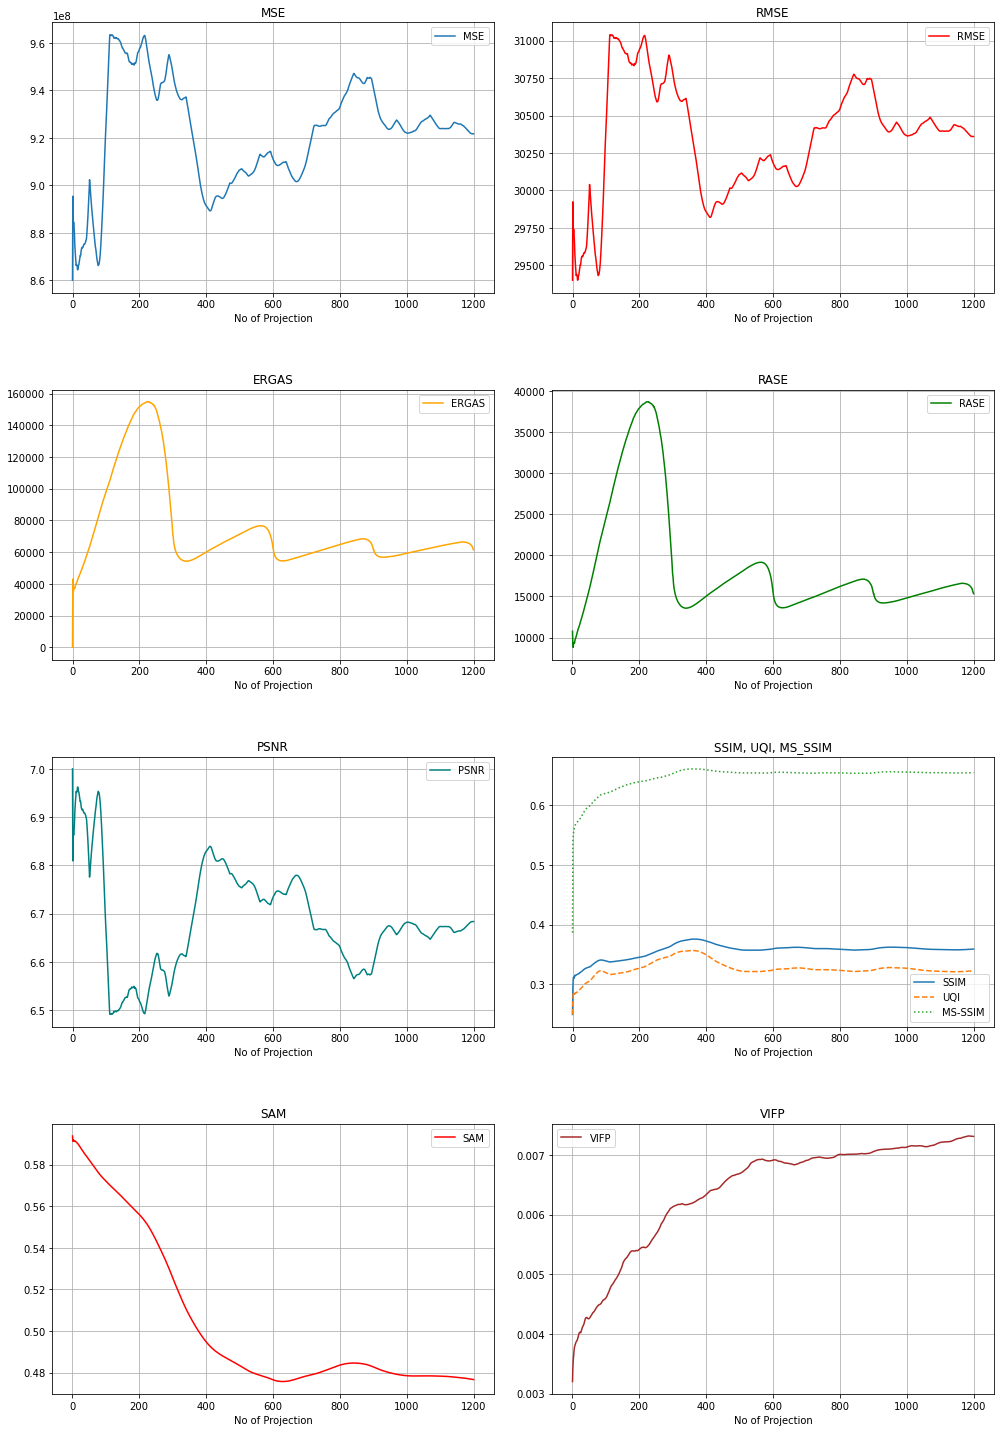

In [7]:
val=np.delete(stats,0,0)
scipy.io.savemat("BP.mat", {"values": val})

piter=1200

val[0,0]=8.6e8
fig, axs = pl.subplots(4,2,figsize=(14, 20))  
axs[0,0].plot(range(piter), val[:,0],label='MSE');
axs[0,0].set_xlabel('No of Projection')
axs[0,0].set_title("MSE")
axs[0,0].legend();
axs[0,0].grid(True);

val[0,1]=29400
axs[0,1].plot(range(piter), val[:,1],label='RMSE',color='red');
axs[0,1].set_xlabel('No of Projection')
axs[0,1].set_title("RMSE")
axs[0,1].legend();
axs[0,1].grid(True);

 
axs[1,0].plot(range(piter), val[:,7],label='ERGAS',color='orange');
axs[1,0].set_xlabel('No of Projection')
axs[1,0].set_title("ERGAS")
axs[1,0].legend();
axs[1,0].grid(True);


axs[1,1].plot(range(piter), val[:,9],label='RASE',color='green');
axs[1,1].set_xlabel('No of Projection')
axs[1,1].set_title("RASE")
axs[1,1].legend();
axs[1,1].grid(True);

val[0,2]=7
axs[2,0].plot(range(piter), val[:,2],label='PSNR',color='teal');
axs[2,0].set_xlabel('No of Projection')
axs[2,0].set_title("PSNR")
axs[2,0].legend();
axs[2,0].grid(True);

val[0,3]=0.25
val[0,5]=0.25
axs[2,1].plot(range(piter), val[:,3],label='SSIM');
axs[2,1].plot(range(piter), val[:,5],label='UQI',linestyle='--');
axs[2,1].plot(range(piter), val[:,6],label='MS-SSIM',linestyle=':');
axs[2,1].set_xlabel('No of Projection')
axs[2,1].set_title("SSIM, UQI, MS_SSIM")
axs[2,1].legend();
axs[2,1].grid(True);

axs[3,0].plot(range(piter), val[:,10],label='SAM',color='red');
axs[3,0].set_xlabel('No of Projection')
axs[3,0].set_title("SAM")
axs[3,0].legend();
axs[3,0].grid(True);

axs[3,1].plot(range(piter), val[:,11],label='VIFP',color='brown');
axs[3,1].set_xlabel('No of Projection')
axs[3,1].set_title("VIFP")
axs[3,1].legend();
axs[3,1].grid(True);

pl.tight_layout(w_pad=2, h_pad=5.0)

pl.savefig('BP2296_1200_.png',facecolor='white')
